# Exercício: verificando similaridade entre objetos de contratos

Nesse exemplo, irei utilizar um *dataset* de contratos celebrados pela Administração Pública com o objetivo de identificar similaridade entre objetos de contratos distintos.

Para isso, vou usar técnicas de *Natural Language Processing*, especialmente o cálculo de uma **matriz TF-IDF** (*term-frequency, inverse document frequency*) sobre o texto da variável "Objeto" do dataset.

In [ ]:
import pandas as pd

In [2]:
# Lendo os dados do csv
df = pd.read_csv('C:/Users/Samuel/Documents/Dados para R/contratos.csv')

In [3]:
# Visualizando os dados
df.head()

,Identificador do Contrato,UASG,Modalidade da Licitação,Número do Aviso da Licitação,Tipo de Contrato,Licitação associada,Origem da Licitação,Número,Objeto,Número de Aditivos,Número do Processo,Contratada,Data de Assinatura,Fundamento Legal,Data de Início da Vigência,Data de Termino da Vigência,Valor inicial,Aditivos do Contrato > uri,Apostilamentos do Contrato > uri
0,38093150000011014,380931: DELEG.REG. DO TRAB/ALAGOAS,05: PREGÃO,23/2013,50: CONTRATO,PREGÃO 380931.05.00023.2013,SISPP,1/1014,Prestação de Serviços de Vigilância Des armada...,0,46201006411201376,Fornecedor 11.179.264/0007-66: PRESERVE SEGURA...,10/03/2014,"Lei 8.666/93, Dec 2.271/97 e IN SLTI n¨ 02/08.",18/03/2014,17/03/2015,"481.514,00",/contratos/id/contrato/38093150000011014/aditivos,/contratos/id/contrato/38093150000011014/apost...
1,15303254000011978,153032: UNIVERSIDADE FEDERAL DE LAVRAS/MEC/MG,03: CONCORRÊNCIA,1/1978,54: CONCESSÃO,CONCORRÊNCIA 153032.03.00001.1978: Concessão d...,SISPP,1/1978,Concessão de prédio no Campus da UFLA,3,0001/78,Fornecedor 20.372.967/0001-01: SAULO FIDELIS C...,30/06/1978,Lei 8.666 Modalidade Concorrência,30/06/1978,31/12/1979,"111.132,00",/contratos/id/contrato/15303254000011978/aditivos,/contratos/id/contrato/15303254000011978/apost...
2,11460650000011985,114606: UNIDADE ESTADUAL DO IBGE NO PARA,06: DISPENSA DE LICITAÇÃO,1/1999,50: CONTRATO,DISPENSA DE LICITAÇÃO 114606.06.00001.1999: Co...,SISPP,1/1985,Contratação de imóveis para instalação da Agên...,1,PA/036156419/85,NaN,01/10/1997,"De acordo com artigo 24, Inciso X, da Lei 8.66...",01/10/1997,30/09/1999,"8.400,00",/contratos/id/contrato/11460650000011985/aditivos,/contratos/id/contrato/11460650000011985/apost...
3,15404753000011985,154047: UNIVERSIDADE FEDERAL DE PELOTAS/RS,06: DISPENSA DE LICITAÇÃO,1/1985,53: ARRENDAMENTO,DISPENSA DE LICITAÇÃO 154047.06.00001.1985: lo...,SISPP,1/1985,locacao de imovel situado a rua andrade neves ...,0,231100003469320,NaN,01/06/1985,art 24 inciso 10 lei 8666-93,01/11/1998,01/11/1999,"102.000,00",/contratos/id/contrato/15404753000011985/aditivos,/contratos/id/contrato/15404753000011985/apost...
4,15404753000011986,154047: UNIVERSIDADE FEDERAL DE PELOTAS/RS,06: DISPENSA DE LICITAÇÃO,1/1986,53: ARRENDAMENTO,DISPENSA DE LICITAÇÃO 154047.06.00001.1986,SISPP,1/1986,locacao de imovel situado a rua quinze de nove...,0,00000000000097398,NaN,28/11/1986,art 24 inciso 10 da lei 8666-93,01/11/1998,01/11/1999,"50.156,40",/contratos/id/contrato/15404753000011986/aditivos,/contratos/id/contrato/15404753000011986/apost...
5,38004450000011987,380044: DELEG.REG. DO TRAB/PARANA,06: DISPENSA DE LICITAÇÃO,1/1987,50: CONTRATO,DISPENSA DE LICITAÇÃO 380044.06.00001.1987: Co...,SISPP,1/1987,Contrato de locação do imovel da Av. Dr. Vicen...,0,3518300161091,Fornecedor 75.136.127/0001-31: CONCORDE ADMIN...,01/01/1987,"Art. 24, Inciso X, da lei 8666/93.",01/01/1987,28/03/2001,"118.380,72",/contratos/id/contrato/38004450000011987/aditivos,/contratos/id/contrato/38004450000011987/apost...
6,17011650000011988,170116: SUP.REGIONAL RECEITA FEDERAL 7A.RF/RJ,07: INEXIGIBILIDADE DE LICITAÇÃO,1/1988,50: CONTRATO,INEXIGIBILIDADE DE LICITAÇÃO 170116.07.00001.1988,SISPP,1/1988,Contrato nº 01/88 tem por objeto a locação dos...,1,10720000257/86-05,NaN,01/06/1988,Decretos-Leis nºs 2.300/86 e 2.348/87 e Lei nº...,01/06/1988,31/05/1991,"7.220.448,00",/contratos/id/contrato/17011650000011988/aditivos,/contratos/id/contrato/17011650000011988/apost...
7,51208450000011990,512084: UNID.ADMINIST.LOCAL INSS EM MAGE/RJ,06: DISPENSA DE LICITAÇÃO,1/1990,50: CONTRATO,DISPENSA DE LICITAÇÃO 512084.06.00001.1990,SISPP,1/1990,LOCAÇAO DE PREDIO ONDE FUNCIONA O ARQUIVO GERA...,0,35314/7146/89,NaN,03/09/1990,ARTIGO 24/10 LEI 8666/93,03/09/1998,02/09/1999,"15.065,76",/contratos/id/contrato/51208450000011990/aditivos,/contratos/id/contrato/51208450000011990/apost...
8,51211150000011990,512111: GERÊNCIA EXECUTIVA NITERÓI/RJ,06: DISPENSA DE LICITAÇÃO,1/1990,50: CONTRATO,DISPENSA DE LICITAÇÃO 512111.06.0000

In [4]:
# Verificando a classe de cada variável
df.dtypes

Identificador do Contrato            int64
UASG                                object
Modalidade da Licitação             object
Número do Aviso da Licitação        object
Tipo de Contrato                    object
Licitação associada                 object
Origem da Licitação                 object
Número                              object
Objeto                              object
Número de Aditivos                   int64
Número do Processo                  object
Contratada                          object
Data de Assinatura                  object
Fundamento Legal                    object
Data de Início da Vigência          object
Data de Termino da Vigência         object
Valor inicial                       object
Aditivos do Contrato > uri          object
Apostilamentos do Contrato > uri    object
dtype: object

In [5]:
# Verificando o objeto de alguns contratos
df['Objeto'].head()

0      Prestação de Serviços de Vigilância Des armada...
1                  Concessão de prédio no Campus da UFLA
2      Contratação de imóveis para instalação da Agên...
3      locacao de imovel situado a rua andrade neves ...
4      locacao de imovel situado a rua quinze de nove...
5      Contrato de locação do imovel da Av. Dr. Vicen...
6      Contrato nº 01/88 tem por objeto a locação dos...
7      LOCAÇAO DE PREDIO ONDE FUNCIONA O ARQUIVO GERA...
8      Locação de imóvel na localidade de São Gonçalo...
9      Locação dos imóveis de nos. 26, 38 e 44 da Pra...
10     Renovação da locação das lojas A, B, C e D sit...
11     Locação do imóvel situado na Av. Nossa Senhora...
12     Locação de imóvel para a Agência da Receita Fe...
13     Locação do imóvel sito à Rua Domingos Balzani,...
14     Locação de imóvel situado a travessa monsenhor...
15     Contrato nº 01/91 tem por objeto a locação do ...
16     Contrato nº 01/91 tem por objeto a locação de ...
17     locacao de imovel para a

# Análise exploratória de dados

Antes de adentrar na parte central deste exercício, realizei um exemplo de análise exploratória sobre uma das variáveis do dataset. Essa parte serve apenas para lembrar a importância de se fazer esse tipo de atividade.

Nota: o pacote **"seaborn"** foi importado para uso. Este pacote coloca uma camada acima dos gráficos do **matplotlib** para deixá-los mais interessantes.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

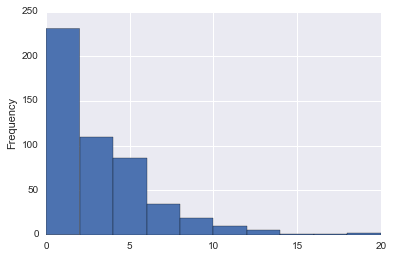

In [5]:
# Plotando o histograma do número de aditivos dos contratos
df['Número de Aditivos'].plot(kind='hist')


Com o gráfico, percebe-se a presença de um *outlier* na ponta direita. Um contrato com 20 aditivos não pode ser normal.

As estatísticas da variável abaixo comprovam isso.


In [11]:
# A função describe() apresenta um resumo da variável.
# Exibe-se a contagem do campo, a média, desvio padrão, mediana, valores mínimo e máximo, além dos primeiro e terceiro quartis
df['Número de Aditivos'].describe()

2.0
count    500.000000
mean       2.790000
std        3.064095
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       20.000000
Name: Número de Aditivos, dtype: float64


Com a estatística acima, fica fácil perceber a presença do *outlier*. Quando a distância do terceiro quartil (75%) para o valor máximo está muito grande, é bastante provável que o valor máximo seja um *outlier*.

Em relação à medida de tendência central do gráfico apresentado anteriormente, é importante lembrar que, nesse caso, o valor mais apropriado para ser usado é a **mediana**, pelo fato de a distribuição ser assimétrica. Nessas situações, a média fica distorcida por conta da presença de *outliers*.

Vamos verificar o *outlier*...

In [15]:
outlier = df[df['Número de Aditivos'] == 20]

In [19]:
# Objeto do contrato do outlier
outlier['Objeto']

94    Obras de manutenção rodoviária, compreendendo ...
Name: Objeto, dtype: object

In [21]:
# Empresa contratada para executar o objeto do contrato outlier
outlier['Contratada']

94    Fornecedor 14.312.169/0001-91: PLANURB PLANEJA...
Name: Contratada, dtype: object

De posse das informações do fornecedor do contrato, poderíamos consultar o DGI Consultas para verificar a situação da empresa. Por exemplo, se ela é inidônea, situação dos sócios, pertinência da sua atividade com o objeto do contrato, etc.

# Natural Language Processing com NLTK e scikit-learn: utilizando a técnica Bag of Words

Agora vamos para o ponto principal deste exercício. Iremos realizar os seguintes passos:

1) Contar as palavras de cada objeto, gerando uma matriz MxN, onde M é o texto completo de cada objeto e N são as palavras encontradas em todos os objetos. É importante perceber que a matriz gerada será uma *sparse matrix*, pois conterá grande quantidade de 0's. Esse procedimento é conhecido como **Bag of Words**. Para isso, será utilizada a classe **CountVectorizer** do scikit-learn.

2) De maneira a eliminar a influência de palavras que possuem alta contagem apenas porque o texto do objeto em que elas aparecem são mais longos, é necessário ponderar a presença das palavras em cada texto com a quantidade de vezes em que aparecem em textos diferentes. Esse procedimento produz a **matriz TF-IDF** (*term-frequency x inverse document frequency*). Para isso, será utilizada a classe **TfidfTransformer** do scikit-learn.

3) Utilização da métrica *cosine similarity* para comparação entre os objetos dos contratos, a partir da matriz TF-IDF. Essa métrica é muito utilizada na verificação de similaridade entre textos diferentes.

In [23]:
import re

In [24]:
# Definindo função que recebe um texto e retira todos os números, pontuações etc, deixando apenas letras.
# Esse passo é comum quando se trabalha com comparação de textos.
def clean(text):
    texto_letras = re.sub(r'[^a-zA-Z]', ' ', text)
    return texto_letras.lower()

Do pacote NLTK, importamos as *stopwords*, que são palavras que não carregam muito sentido no texto, como "a", "de", "por", etc.

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [32]:
# Criando uma instância da classe CountVectorizer
vect = CountVectorizer(preprocessor=clean, stop_words=stopwords.words('portuguese'))

In [41]:
# aplicando a contagem de palavras nos objetos dos contratos
objetos_vect = vect.fit_transform(df['Objeto'])

In [39]:
from sklearn.feature_extraction.text import TfidfTransformer

In [40]:
# Criando uma instância da classe TfidfTransformer
tfidf = TfidfTransformer()

In [43]:
# gerando a matriz TF-IDF
objetos_tfidf = tfidf.fit_transform(objetos_vect)

In [44]:
from sklearn.metrics.pairwise import cosine_similarity

A seguir, será definida uma função que recebe o texto de um determinado objeto e o compara à todos os outros do *dataset*. Ao final, retorna os 5 objetos mais similares ao que foi passado.

In [54]:
def objetos_similares(objeto, top=5):
    sims = pd.DataFrame.from_records(cosine_similarity(objeto, objetos_tfidf), columns=range(0,500)).T
    return sims.rename(columns={0: 'similarity'}).sort_values('similarity', ascending=False).head(top+1).tail(top)

In [69]:
# Testando a função com o objeto de índice 6
objetos_similares(objetos_tfidf[6])

,similarity
16,0.784124
9,0.425388
360,0.248478
15,0.246908
498,0.220881


Portanto, o objeto do contrato de índice 6 é 78% similar ao objeto do contrato de índice 16. Vamos verificar?

In [70]:
print(df['Objeto'][6])
print(df['Objeto'][16])

Contrato nº 01/88 tem por objeto a locação dos imóveis nºs 26, 38 e44 da Praça Oliveira Figueiredo, Barra do Piraí, Estado do Rio de Janeiro.
Contrato nº 01/91 tem por objeto a locação de imóvel constituído deuma loja, localizada na Praça Oliveira Figueiredo nº 40, Barra do Piraí, Estado do Rio de Janeiro.


Como visto, os objetos dos contratos acima são bastante similares.

Com base nesse exercício, podemos perceber o potencial de uso dessa técnica na análise de nossas bases textuais no TCU. 